In [1]:
import pandas as pd
import numpy as np
import string
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('final_data.csv', sep=',', encoding='utf-8')
data.tail(100)

,content,sentiment
9377,👍,POSITIF
9378,"Apk dalam negri ribet, dikit2 update ganggu bi...",NEGATIF
9379,UPDATE MULU KESEL,NEGATIF
9380,Semakin diperbaharui semakin lemot downloadnya,NEGATIF
9381,Oke bet,POSITIF
...,...,...
9472,Update mlu gajelas,NEGATIF
9473,Aplikasi pemaksaan kalo gak di update gak bisa...,NEGATIF
9474,Kok minta di Update malah lodingnya ngak seles...,NEGATIF
9475,Pemaksaan,NEGATIF


# Data Pre-processing

In [3]:
#proses menghilangkan unicode dan emoji
import re
def remove_emojis(content):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', content)
data['content'] = data['content'].apply(lambda x: remove_emojis(x))

#remove symbols and punctuation
def remove_symbol(content):
    content_nopunct = "" .join([c for c in content if c not in string.punctuation])
    content_nopunct = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", content_nopunct)
    return content_nopunct
data['content'] = data['content'].apply(lambda x: remove_symbol(x))
data.tail(100)

,content,sentiment
9377,,POSITIF
9378,Apk dalam negri ribet dikit2 update ganggu bik...,NEGATIF
9379,UPDATE MULU KESEL,NEGATIF
9380,Semakin diperbaharui semakin lemot downloadnya,NEGATIF
9381,Oke bet,POSITIF
...,...,...
9472,Update mlu gajelas,NEGATIF
9473,Aplikasi pemaksaan kalo gak di update gak bisa...,NEGATIF
9474,Kok minta di Update malah lodingnya ngak seles...,NEGATIF
9475,Pemaksaan,NEGATIF


In [4]:
#proses case folding

import re
def casefolding(content):
    content = content.lower()
    content = content.strip(" ")
    content = re.sub(r'[?|$|.|!²_:")(-+,]','',content)
    content = re.sub(r"\d+", "", content)
    content = content.translate(str.maketrans("","",string.punctuation))
    content = content.strip()
    return content
data['content'] = data['content'].apply(casefolding)
data.tail(100)

,content,sentiment
9377,,POSITIF
9378,apk dalam negri ribet dikit update ganggu biki...,NEGATIF
9379,update mulu kesel,NEGATIF
9380,semakin diperbaharui semakin lemot downloadnya,NEGATIF
9381,oke bet,POSITIF
...,...,...
9472,update mlu gajelas,NEGATIF
9473,aplikasi pemaksaan kalo gak di update gak bisa...,NEGATIF
9474,kok minta di update malah lodingnya ngak seles...,NEGATIF
9475,pemaksaan,NEGATIF


In [5]:
#proses tokenizing

def token(content):
    nstr = content.split(' ')
    dat= []
    a = -1
    for hu in nstr:
        a = a + 1
    if hu == '':
        dat.append(a)
    p = 0
    b = 0
    for q in dat:
        b = q - p
        del nstr[b]
        p = p + 1
    return nstr

data['content'] = data['content'].apply(token)
data.tail(100)

,content,sentiment
9377,[],POSITIF
9378,"[apk, dalam, negri, ribet, dikit, update, gang...",NEGATIF
9379,"[update, mulu, kesel]",NEGATIF
9380,"[semakin, diperbaharui, semakin, lemot, downlo...",NEGATIF
9381,"[oke, bet]",POSITIF
...,...,...
9472,"[update, mlu, gajelas]",NEGATIF
9473,"[aplikasi, pemaksaan, kalo, gak, di, update, g...",NEGATIF
9474,"[kok, minta, di, update, malah, lodingnya, nga...",NEGATIF
9475,[pemaksaan],NEGATIF


In [6]:
#Proses Filtering

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stopwords_removal(content):
    factory = StopWordRemoverFactory()
    x = []
    data = []
    def myFunc(x):
        if x in factory:
            return False
        else:
            return True
    fit = filter(myFunc, content)
    for x in fit:
        data.append(x)
        return data
    data['content'] = data['content'].apply(stopword_removal)

In [7]:
data.head(400)

,content,sentiment
0,[top],POSITIF
1,[ooyii],POSITIF
2,"[habis, diupdate, aplikasi, ini, malah, nggak,...",NEGATIF
3,"[data, saya, di, klaim, oleh, orang, lain, , n...",NEGATIF
4,[bagus],POSITIF
...,...,...
395,[],POSITIF
396,[bagus],POSITIF
397,"[knpa, saya, tidak, bisa, color, ini, lagi]",POSITIF
398,"[mau, taya, kalau, cara, ganti, nomr, yng, ter...",POSITIF


In [7]:

%%time
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(content):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in content:
        dt = stemmer.stem(w)
        do.append(dt)
        d_clean=[]
        d_clean=" ".join(do)
        print(d_clean)
        return d_clean
data['content'] = data['content'].apply(stemming)
#proses stemiming


top
ooyii
habis
data
bagus
bagus
tidak
good
yay
saya
ff
keren
sangat
terima
saya
ok
scan
mau
siip
sangat
telah
vaksin
sippp
bagus
kenapa
top
ok
mudah
sekarang
good
good
ok
lupa
selalu
thank
good
mantap
baguss
saya
bagus
bagus
aplikasi
mantap
kalo
terima
saya
ok
mantap
bantu
bagus
jelek
peduli
bagus
aplikasi
moga
terima
ok
ok
baik
aplikasi
alhamdulilah
good
kalau
gk
sayaa
bisa
kenapa
baik
ok
ok
oke
p
sehat
baik
sanggat
tiap
lama
kenapa
gak
bagus
mantap
insyalloh
nyusahin
oke
bagus
tuti
ga
ok
xx
lumayan
minta
saya
ok
aplikasi
mom
baik
aplikasi
baik
bingung
okeeee
aplikasi
tolong
knpa
kenapa
ok
baik
di
baik
ok
ok
sekarang
sangat
tksi
lebih
gak
gak
bagus
sangat
baik
proses
baik
top
bagus
top
baik
nyaman
ok
susah
kecewa
sudah
bantu
good
tidak
bagus
hih
tiap
bagus
bagus
oke
bgs
lot
amazingguys
sangat
keren
ok
keep
makin
good
good
kdg
mantab
gw
kok
top
sudah
bagus
telah
jauh
ok
aplikasi
mantap
mantap
kecewa
peduli
bagus
gak
bagus
bagus
bagus
ok
bgus
n
saya
bagus
ok
lbh
baik
saya
bagussss
kode

In [8]:
data = data.astype({'sentiment' : 'category'})
data = data.astype({'content' : 'string'})
data.dtypes

content        string
sentiment    category
dtype: object

In [9]:
data["sentiment"].value_counts()
cleanup_nums = {"sentiment":     {"NEGATIF":0, "POSITIF": 1,}}
data = data.replace(cleanup_nums)
data.head(100)

,content,sentiment
0,top,1
1,ooyii,1
2,habis,0
3,data,0
4,bagus,1
...,...,...
95,saya,0
96,ok,1
97,aplikasi,0
98,mom,1


In [10]:
#proses TF-IDF

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['content'].astype('U'))
text_tf

<9477x1491 sparse matrix of type '<class 'numpy.float64'>'
	with 9409 stored elements in Compressed Sparse Row format>

In [11]:
#proses split data

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(text_tf, data['sentiment'], test_size=0.2, random_state = 42)



In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7581, 1491) (7581,)
(1896, 1491) (1896,)


# Classifier

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from jcopml.plot import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Naive Bayes classifier

In [25]:
%%time
clf_MNB = MultinomialNB().fit(X_train, y_train)
y_pred = clf_MNB.predict(X_test)
confusion_matrix(y_test, y_pred)

Wall time: 107 ms


array([[633, 183],
       [143, 937]], dtype=int64)

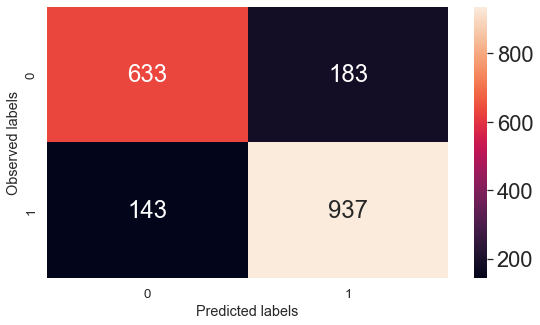

In [26]:
f, ax = plt.subplots(figsize=(9,5))
sns.set(font_scale=2.0)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted labels")
plt.ylabel("Observed labels")
plt.savefig('NaiveBayes.png', dpi=400)
plt.show()

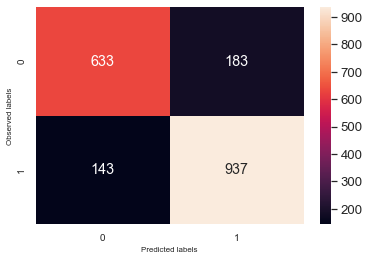

In [27]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.set(font_scale=1.2) #edited as suggested
sns.heatmap(cm, annot=True, ax=ax, fmt="g");  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=8);
ax.set_ylabel('Observed labels',fontsize=8);

ax.xaxis.set_ticklabels(['0', '1'],fontsize=10);
ax.yaxis.set_ticklabels(['0', '1'],fontsize=10);
plt.savefig('NaiveBayes2.png', dpi=400)
plt.show()

In [28]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       816
           1       0.84      0.87      0.85      1080

    accuracy                           0.83      1896
   macro avg       0.83      0.82      0.82      1896
weighted avg       0.83      0.83      0.83      1896



# K-Neighbors Classifier

In [ ]:
%%time
clf_KNN5 = neighbors.KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred = clf_KNN5.predict(X_test)
confusion_matrix(y_test, y_pred)

Wall time: 890 ms


array([[740,  76],
       [245, 835]], dtype=int64)

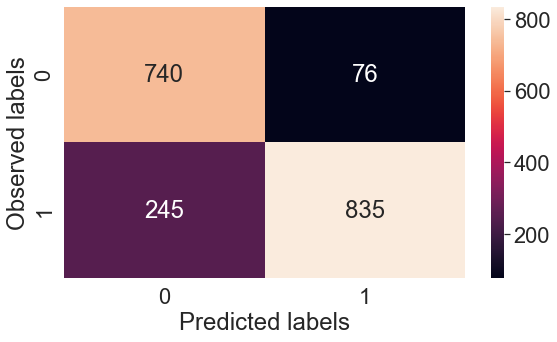

In [23]:
f, ax = plt.subplots(figsize=(9,5))
sns.set(font_scale=2.0)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted labels")
plt.ylabel("Observed labels")
plt.savefig('KNN5.png', dpi=400)
plt.show()

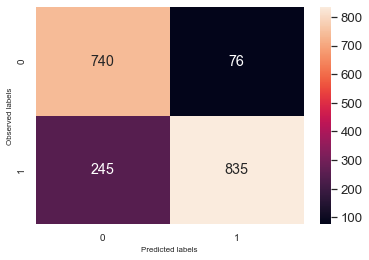

In [24]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.set(font_scale=1.2) #edited as suggested
sns.heatmap(cm, annot=True, ax=ax, fmt="g");  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=8);
ax.set_ylabel('Observed labels',fontsize=8);

ax.xaxis.set_ticklabels(['0', '1'],fontsize=10);
ax.yaxis.set_ticklabels(['0', '1'],fontsize=10);
plt.savefig('KNN52.png', dpi=400)
plt.show()

In [28]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       816
           1       0.92      0.77      0.84      1080

    accuracy                           0.83      1896
   macro avg       0.83      0.84      0.83      1896
weighted avg       0.85      0.83      0.83      1896



In [29]:
%%time
clf_KNN10 = neighbors.KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
y_pred = clf_KNN10.predict(X_test)
confusion_matrix(y_test, y_pred)

Wall time: 361 ms


array([[754,  62],
       [258, 822]], dtype=int64)

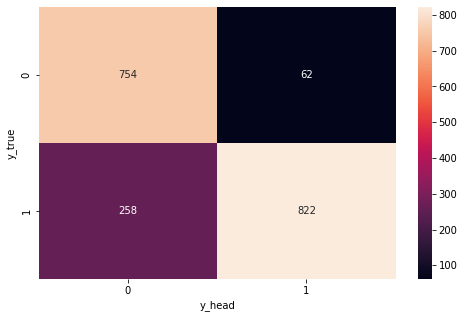

In [30]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [31]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       816
           1       0.93      0.76      0.84      1080

    accuracy                           0.83      1896
   macro avg       0.84      0.84      0.83      1896
weighted avg       0.85      0.83      0.83      1896



In [32]:
%%time
clf_KNN15 = neighbors.KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)
y_pred = clf_KNN15.predict(X_test)
confusion_matrix(y_test, y_pred)

Wall time: 335 ms


array([[631, 185],
       [160, 920]], dtype=int64)

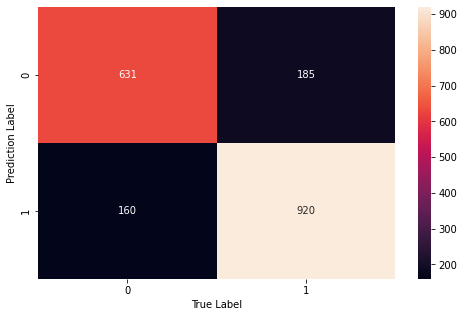

In [33]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Prediction Label")
plt.show()

In [34]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       816
           1       0.83      0.85      0.84      1080

    accuracy                           0.82      1896
   macro avg       0.82      0.81      0.81      1896
weighted avg       0.82      0.82      0.82      1896

